In [56]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Read in cleaned data
clean_data = "./data/processed/US_SRG_merged_clean.pkl"
df_clean = pd.read_pickle(clean_data)

df_clean.head()

,Date,Rain_mm,AirTemp_C,SolarRad_kWm2,VPD_kPa,SoilTemp_10cm_C,SoilH2O_m3m3,Wind_speed_ms,RelHum_%,ET_mm_month
0,2020-01-01,0.803,10.648,0.155802,0.8084,16.187,14.511,1.865,36.957678,17.5768
1,2020-02-01,0.928,11.139,0.195431,0.9336,16.180,13.042,2.313,29.533900,43.3578
2,2020-03-01,0.877,13.300,0.221349,0.9693,16.185,10.743,2.191,36.539953,55.9308
3,2020-04-01,0.271,18.385,0.319464,1.7799,16.182,5.891,2.142,15.823503,42.8244
4,2020-05-01,0.451,24.416,0.328748,2.6492,16.194,3.809,1.932,13.403330,59.3344


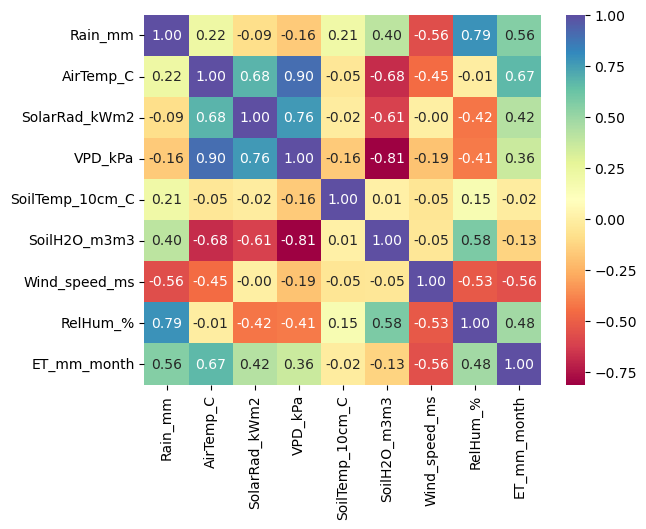

In [21]:
corr_matrix = df_clean.drop('Date', axis=1).corr()

sns.heatmap(corr_matrix, annot=True, cmap='Spectral', fmt=".2f")

plt.show()

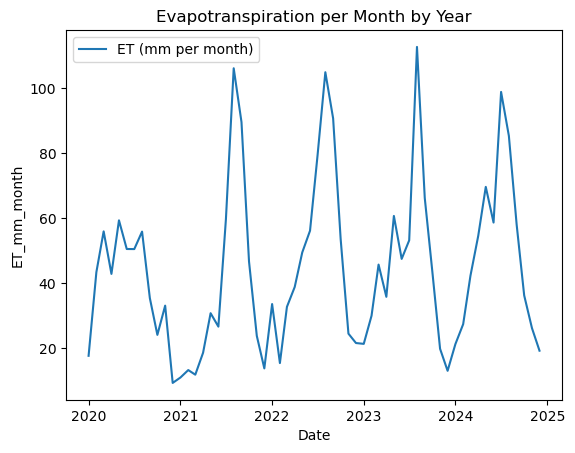

In [24]:
sns.lineplot(data=df_clean, x='Date', y='ET_mm_month', label='ET (mm per month)')

plt.title('Evapotranspiration per Month by Year')
plt.show()

In [54]:
#sns.regplot(data=df_clean, x='SoilTemp_10cm_C', y='ET_mm_month', scatter_kws={'alpha':0.4})
#plt.title('ET Relationship: Soil Temperature')

Text(0.5, 1.0, 'ET Relationship: Rain')

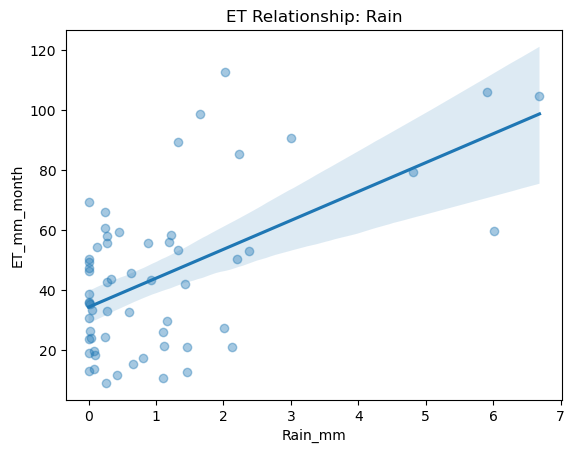

In [34]:
sns.regplot(data=df_clean, x='Rain_mm', y='ET_mm_month', scatter_kws={'alpha':0.4})
plt.title('ET Relationship: Rain')

In [53]:
#sns.regplot(data=df_clean, x='SolarRad_kWm2', y='ET_mm_month', scatter_kws={'alpha':0.4})
#plt.title('ET Relationship: Solar Radiation')

Text(0.5, 1.0, 'ET Relationship: Air Temperature')

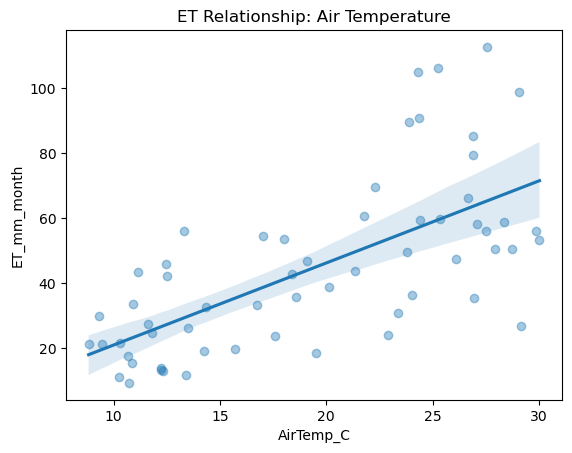

In [58]:
sns.regplot(data=df_clean, x='AirTemp_C', y='ET_mm_month', scatter_kws={'alpha':0.4})
plt.title('ET Relationship: Air Temperature')

Text(0.5, 1.0, 'ET Relationship: Air Temperature w/ Rain')

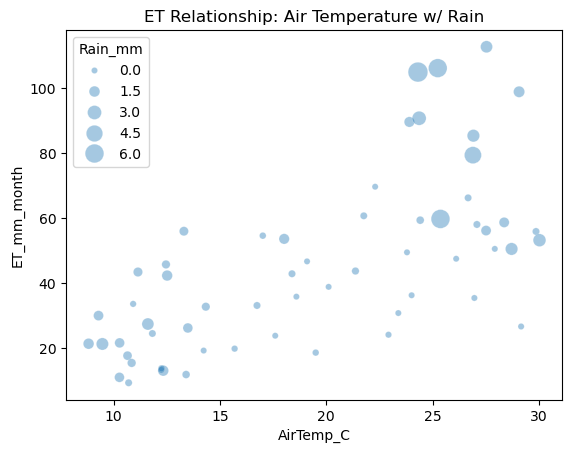

In [78]:
sns.scatterplot(data=df_clean, x='AirTemp_C', y='ET_mm_month', size='Rain_mm', sizes=(20, 200), alpha=0.4)
plt.title('ET Relationship: Air Temperature w/ Rain')

Text(0.5, 1.0, 'ET Relationship: Wind Speed')

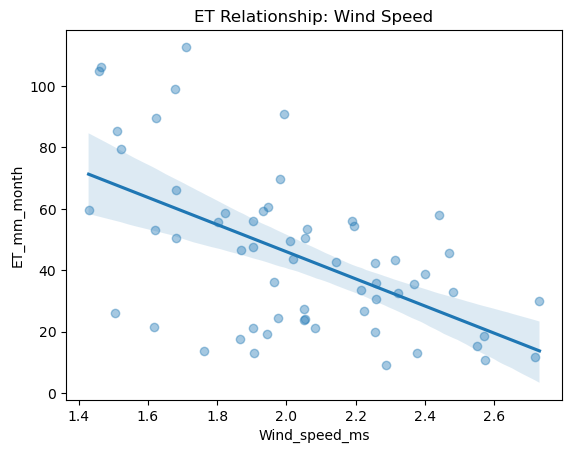

In [79]:
sns.regplot(data=df_clean, x='Wind_speed_ms', y='ET_mm_month', scatter_kws={'alpha':0.4})
plt.title('ET Relationship: Wind Speed')

Text(0.5, 1.0, 'ET Relationship: Relative Humidity')

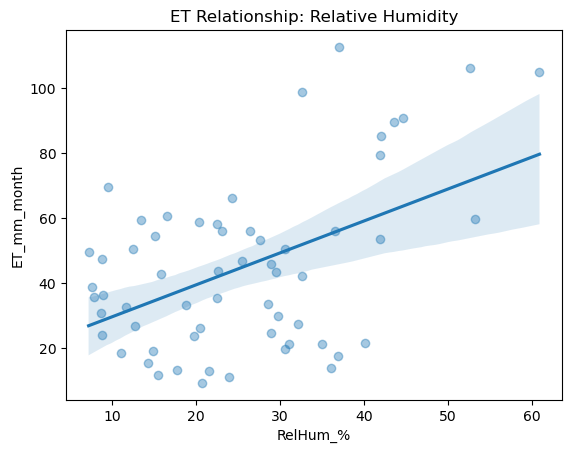

In [98]:
sns.regplot(data=df_clean, x='RelHum_%', y='ET_mm_month', scatter_kws={'alpha':0.4})
plt.title('ET Relationship: Relative Humidity')

Text(0.5, 1.0, 'ET Relationship: Soil Moisture')

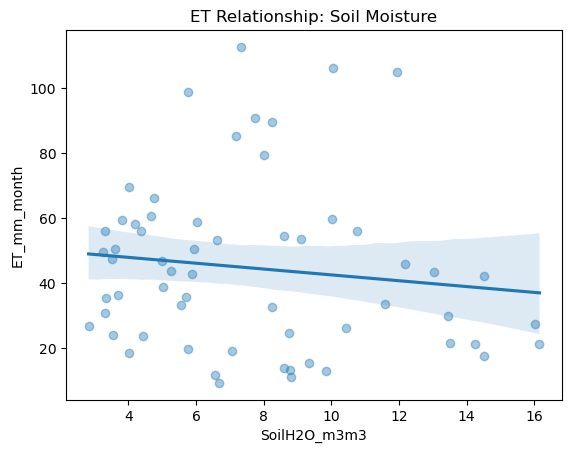

In [43]:
sns.regplot(data=df_clean, x='SoilH2O_m3m3', y='ET_mm_month', scatter_kws={'alpha':0.4})
plt.title('ET Relationship: Soil Moisture')

<Axes: xlabel='Wind_speed_ms', ylabel='ET_mm_month'>

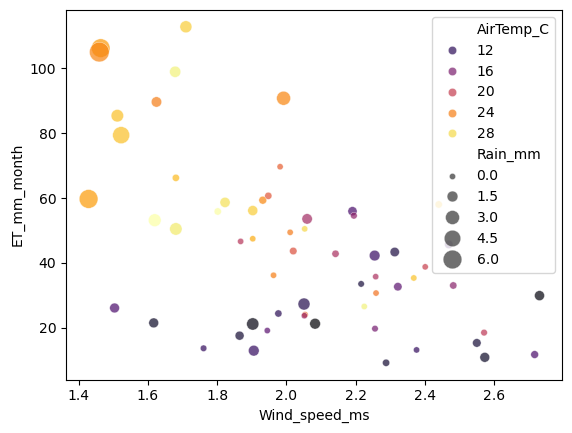

In [96]:
sns.scatterplot(data=df_clean, x='Wind_speed_ms', y='ET_mm_month', hue='AirTemp_C', palette='inferno', size='Rain_mm', sizes=(20,200), alpha=0.7)

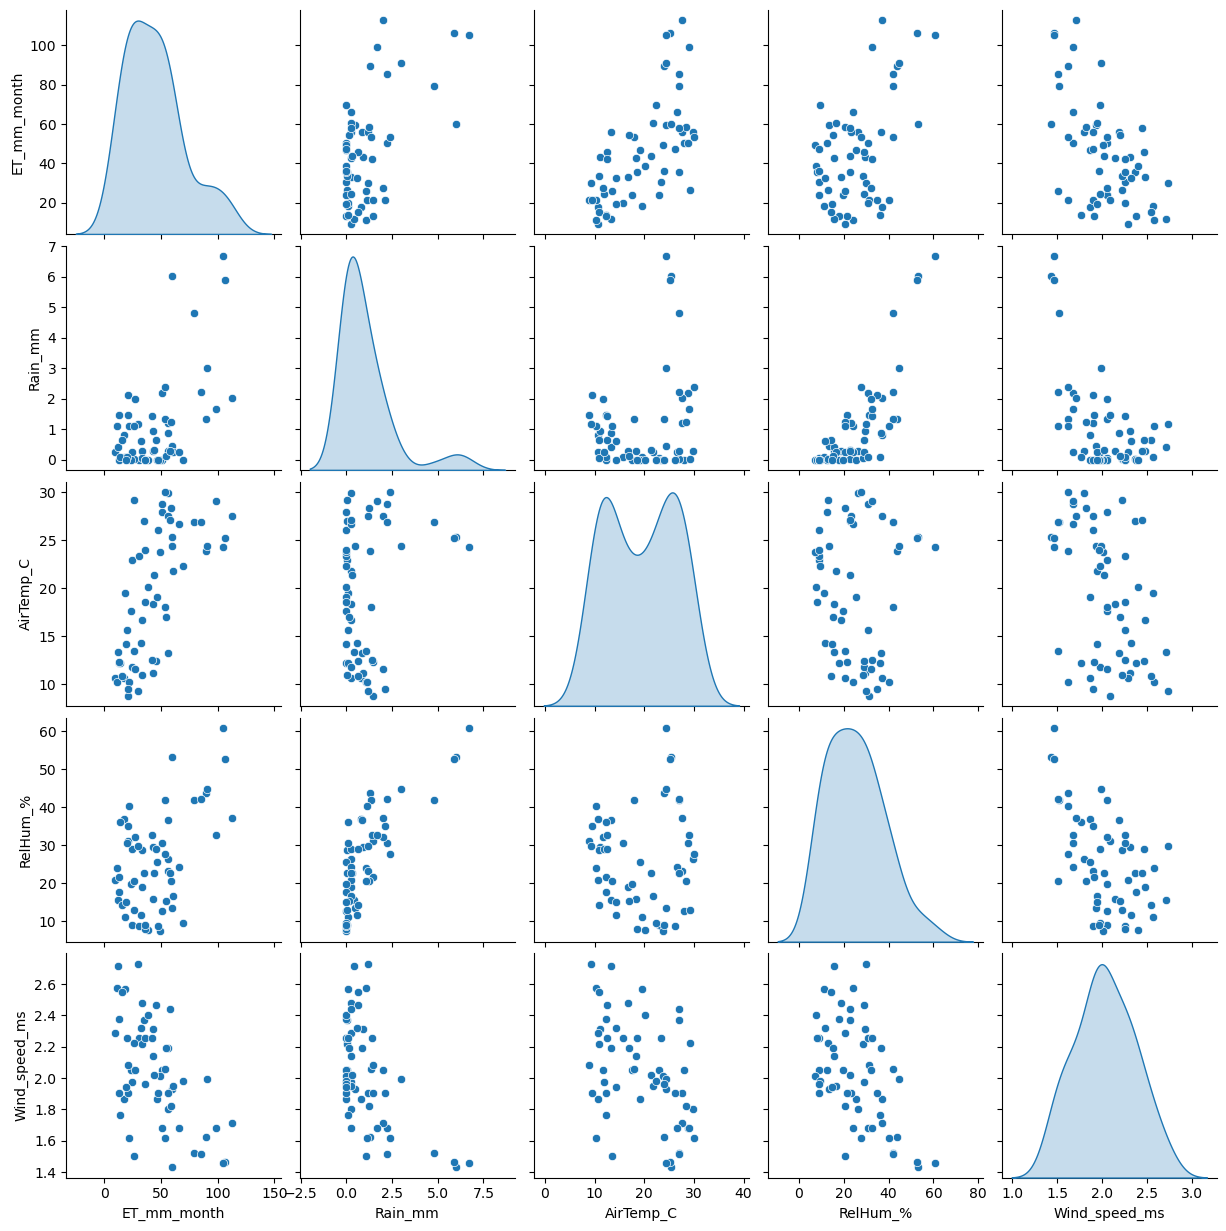

In [100]:
et_vars = ['ET_mm_month', 'Rain_mm', 'AirTemp_C', 'RelHum_%', 'Wind_speed_ms']

sns.pairplot(df_clean[et_vars], diag_kind='kde')
plt.show()

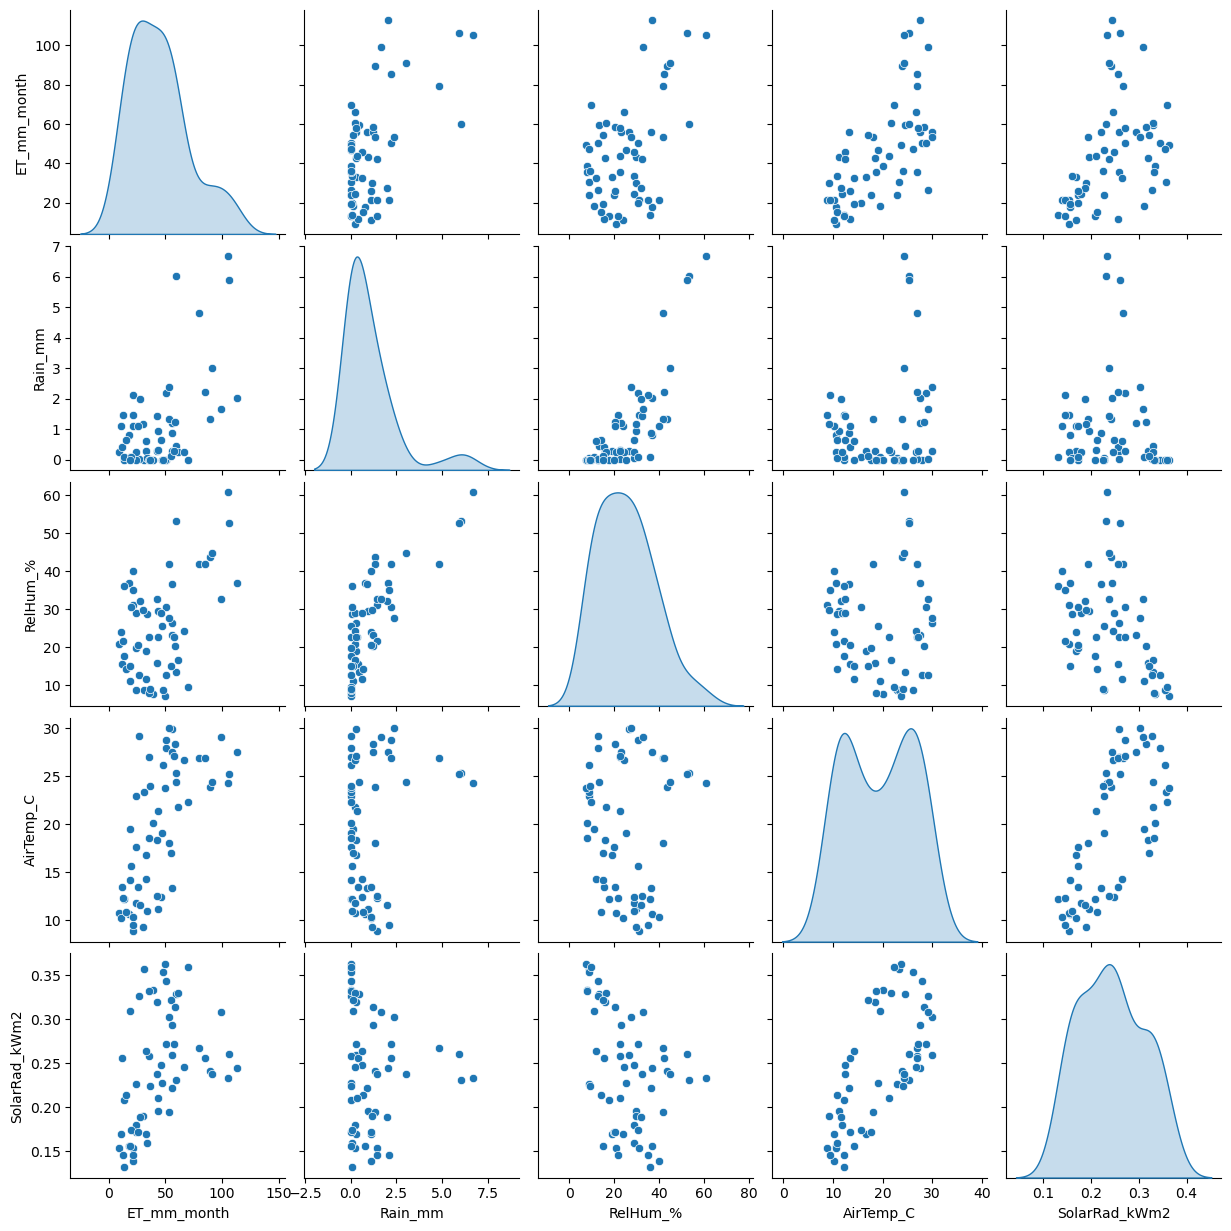

In [49]:
#et_vars = ['ET_mm_month', 'Rain_mm', 'RelHum_%', 'AirTemp_C', 'SolarRad_kWm2']

#sns.pairplot(df_clean[et_vars], diag_kind='kde')
#plt.show()

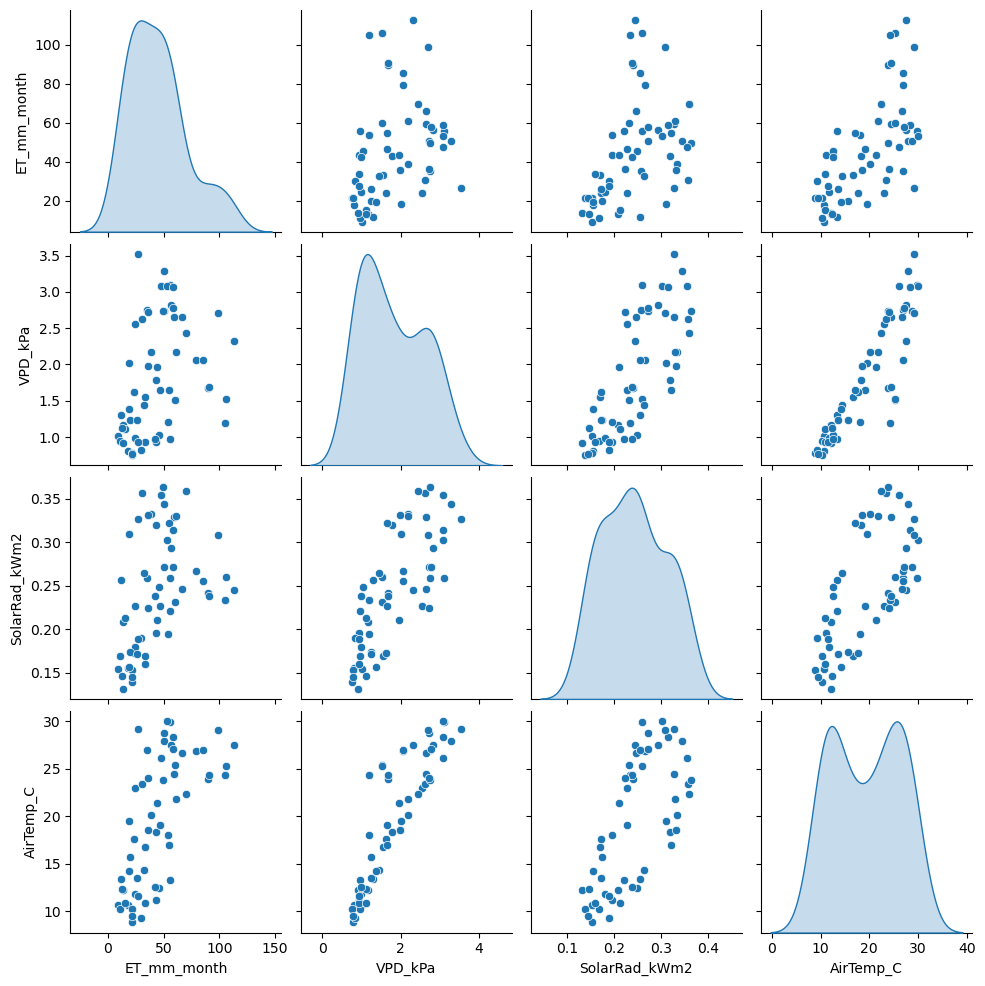

In [44]:
#et_vars = ['ET_mm_month', 'VPD_kPa', 'SolarRad_kWm2', 'AirTemp_C']

#sns.pairplot(df_clean[et_vars], diag_kind='kde')
#plt.show()

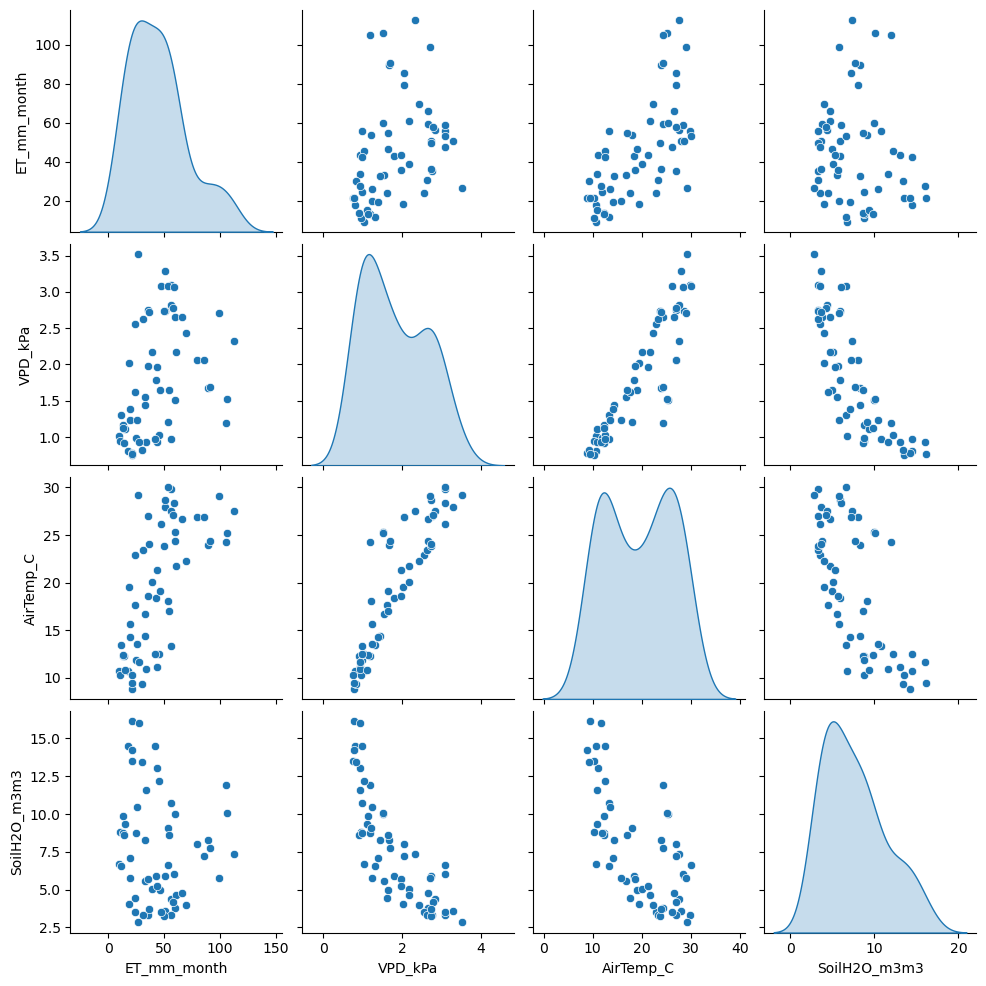

In [46]:
#et_vars = ['ET_mm_month', 'VPD_kPa', 'AirTemp_C', 'SoilH2O_m3m3']

#sns.pairplot(df_clean[et_vars], diag_kind='kde')
#plt.show()